In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from simple_colors import *

In [2]:
df=pd.read_csv("C:/Users/RSB - Thangaraj/Task_files/tn.csv")

In [3]:
df['Yield'] = df['Production'] / df['Area']

In [4]:
df = df.drop(['District_Id','Crop_Id'],axis=1)
df

,State,District,Year,Season,Crop,Area,Production,Yield
0,Tamil Nadu,ARIYALUR,2008,Kharif,Rice,24574,76113.0,3.097298
1,Tamil Nadu,ARIYALUR,2008,Whole Year,Arhar/Tur,209,159.0,0.760766
2,Tamil Nadu,ARIYALUR,2008,Whole Year,Bajra,565,949.0,1.679646
3,Tamil Nadu,ARIYALUR,2008,Whole Year,Banana,190,8168.0,42.989474
4,Tamil Nadu,ARIYALUR,2008,Whole Year,Cashewnut,31113,9951.0,0.319834
...,...,...,...,...,...,...,...,...
13310,Tamil Nadu,VIRUDHUNAGAR,2013,Whole Year,Small millets,1187,676.0,0.569503
13311,Tamil Nadu,VIRUDHUNAGAR,2013,Whole Year,Sugarcane,2917,296017.0,101.479945
13312,Tamil Nadu,VIRUDHUNAGAR,2013,Whole Year,Sweet potato,4,84.0,21.000000
13313,Tamil Nadu,VIRUDHUNAGAR,2013,Whole Year,Tapioca,4,120.0,30.000000


In [5]:
print(blue(("Please select the District you want to predict : ",df.District.unique()),['bold']))
dist = str(input("Enter the District : ").upper())
District = dist
print(green(("Please select the District you want to predict : ",df.Crop.unique()),['bold']))
crop = str(input("Enter the Crop : ")).capitalize()
Crop = crop
area = input("Enter the Land Area : ")
Area=int(area)

('Please select the District you want to predict : ', array(['ARIYALUR', 'COIMBATORE', 'CUDDALORE', 'DHARMAPURI', 'DINDIGUL',
       'ERODE', 'KANCHIPURAM', 'KANNIYAKUMARI', 'KARUR', 'KRISHNAGIRI',
       'MADURAI', 'NAGAPATTINAM', 'NAMAKKAL', 'PERAMBALUR', 'PUDUKKOTTAI',
       'RAMANATHAPURAM', 'SALEM', 'SIVAGANGA', 'THANJAVUR',
       'THE NILGIRIS', 'THENI', 'THIRUVALLUR', 'THIRUVARUR',
       'TIRUCHIRAPPALLI', 'TIRUNELVELI', 'TIRUPPUR', 'TIRUVANNAMALAI',
       'TUTICORIN', 'VELLORE', 'VILLUPURAM', 'VIRUDHUNAGAR'], dtype=object))
Enter the District : THANJAVUR
('Please select the District you want to predict : ', array(['Rice', 'Arhar/Tur', 'Bajra', 'Banana', 'Cashewnut', 'Castor seed',
       'Coconut ', 'Coriander', 'Cotton(lint)', 'Dry chillies',
       'Groundnut', 'Jowar', 'Maize', 'Moong(Green Gram)', 'Onion',
       'Ragi', 'Sugarcane', 'Sunflower', 'Sweet potato', 'Tapioca',
       'Turmeric', 'Urad', 'Small millets', 'Sesamum', 'Horse-gram',
       'Tobacco', 'Black pepp

In [6]:
df1 = df.loc[(df['District'] == District) & (df['Crop'] == Crop)]
df1

,State,District,Year,Season,Crop,Area,Production,Yield
7814,Tamil Nadu,THANJAVUR,1997,Whole Year,Rice,181496,489770.0,2.698517
7828,Tamil Nadu,THANJAVUR,1998,Kharif,Rice,194652,674525.0,3.465287
7847,Tamil Nadu,THANJAVUR,1999,Kharif,Rice,189074,610534.0,3.229074
7867,Tamil Nadu,THANJAVUR,2000,Kharif,Rice,196816,678014.0,3.444913
7885,Tamil Nadu,THANJAVUR,2001,Kharif,Rice,192161,561650.0,2.922810
7897,Tamil Nadu,THANJAVUR,2002,Kharif,Rice,139186,318325.0,2.287048
7946,Tamil Nadu,THANJAVUR,2003,Kharif,Rice,123293,354937.0,2.878809
7991,Tamil Nadu,THANJAVUR,2004,Kharif,Rice,160608,439323.0,2.735374
8015,Tamil Nadu,THANJAVUR,2005,Kharif,Rice,154901,399483.0,2.578957
8031,Tamil Nadu,THANJAVUR,2006,Kharif,Rice,164243,598160.0,3.641921


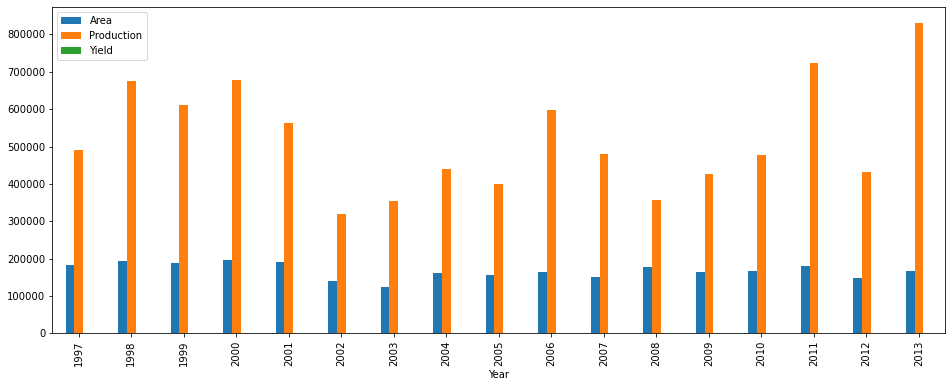

In [7]:
plotdf = df1[['Year','Area','Production','Yield']].set_index('Year')
plotdf.plot(kind='bar',figsize=(16,6))

In [8]:
cat_data = df1[['Year','Season','Area','Production','Yield']]
cat_data = cat_data.join(pd.get_dummies(cat_data['Season']))

In [9]:
cat_data.columns = cat_data.columns.to_series().apply(lambda x: x.strip())
cat_data

,Year,Season,Area,Production,Yield,Kharif,Whole Year
7814,1997,Whole Year,181496,489770.0,2.698517,0,1
7828,1998,Kharif,194652,674525.0,3.465287,1,0
7847,1999,Kharif,189074,610534.0,3.229074,1,0
7867,2000,Kharif,196816,678014.0,3.444913,1,0
7885,2001,Kharif,192161,561650.0,2.922810,1,0
7897,2002,Kharif,139186,318325.0,2.287048,1,0
7946,2003,Kharif,123293,354937.0,2.878809,1,0
7991,2004,Kharif,160608,439323.0,2.735374,1,0
8015,2005,Kharif,154901,399483.0,2.578957,1,0
8031,2006,Kharif,164243,598160.0,3.641921,1,0


In [10]:
x = cat_data[['Year','Area','Whole Year','Kharif']].values
y = cat_data[['Production','Yield']].values

In [11]:
print(x.shape)
print(y.shape)

(17, 4)
(17, 2)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13, 4)
(4, 4)
(13, 2)
(4, 2)


# Linear Regressor

In [15]:
LR_model = LinearRegression()
LR_model.fit(x_train,y_train)
y_pred1 = LR_model.predict(x_test)
y_pred1

array([[3.85774382e+05, 2.77688115e+00],
       [6.14402841e+05, 3.12198581e+00],
       [6.06612590e+05, 3.40222593e+00],
       [4.85338590e+05, 3.00385503e+00]])

In [17]:
pre_result = {"Original":y_test.ravel(),"Predicted":y_pred1.ravel()}
pre_result

{'Original': array([3.18325000e+05, 2.28704755e+00, 6.78014000e+05, 3.44491302e+00,
        7.22576000e+05, 3.99524491e+00, 4.39323000e+05, 2.73537433e+00]),
 'Predicted': array([3.85774382e+05, 2.77688115e+00, 6.14402841e+05, 3.12198581e+00,
        6.06612590e+05, 3.40222593e+00, 4.85338590e+05, 3.00385503e+00])}

In [18]:
LR_model.score(x_train,y_train)

0.1919091693643249

In [19]:
print(green(("Accuracy of model : ",r2_score(y_test.reshape(-1, 1),y_pred1.reshape(-1, 1))*100),['bold']))

('Accuracy of model : ', 96.5181174573654)


# RandomForest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
RF_model = RandomForestRegressor()
RF_model.fit(x_train,y_train)
y_pred2 = RF_model.predict(x_test)

In [21]:
pre_result1 = {"Original":y_test.ravel(),"Predicted":y_pred2.ravel()}
pre_result1

{'Original': array([3.18325000e+05, 2.28704755e+00, 6.78014000e+05, 3.44491302e+00,
        7.22576000e+05, 3.99524491e+00, 4.39323000e+05, 2.73537433e+00]),
 'Predicted': array([4.37694940e+05, 2.87983388e+00, 6.05419060e+05, 3.16510766e+00,
        4.47872790e+05, 2.61790853e+00, 4.62956230e+05, 3.02636170e+00])}

In [22]:
RF_model.score(x_train,y_train)

0.7720992462386156

In [23]:
y_test = y_test.reshape(-1,1)
y_pred2 = y_pred2.reshape(-1,1)

In [24]:
print(green(("Accuracy of model : ",r2_score(y_test,y_pred2)*100),['bold']))

('Accuracy of model : ', 86.23148319007893)


In [25]:
result = [r2_score(y_test.reshape(-1, 1),y_pred1.reshape(-1, 1))*100,r2_score(y_test,y_pred2)*100]

Text(0, 0.5, 'Percentage')

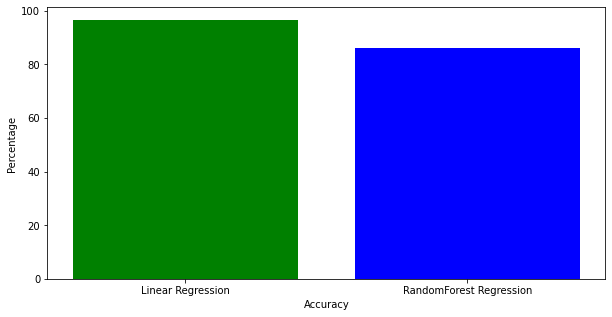

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
height = result
bar = ['Linear Regression','RandomForest Regression']
x_pos = np.arange(len(bar))
plt.figure(figsize=(10,5))
plt.bar(x_pos, height, color=['green', 'blue'])
plt.xticks(x_pos, bar)
plt.xticks(rotation=0)
plt.xlabel('Accuracy')
plt.ylabel('Percentage')